<a href="https://colab.research.google.com/github/KumudaBG/KMeans/blob/main/KMeans_Clustering_Kumuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data collected from https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product

In [ ]:
# importing libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate date range in order og
dateRange = pd.date_range(start='1900-01-01', end='2020-12-31')

In [ ]:
df = pd.DataFrame({ 'date': dateRange})
df['date'] = df['date'].astype(str)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44195 entries, 0 to 44194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    44195 non-null  object
dtypes: object(1)
memory usage: 345.4+ KB


,date
0,1900-01-01
1,1900-01-02
2,1900-01-03
3,1900-01-04
4,1900-01-05


In [ ]:
co2EmissionDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-carbon-co2-emissions.csv')
coalUsageDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-coal-usage-consumption.csv')
fossilFuelDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-fossil-fuel-consumption.csv')
growthRateDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-gdp-growth-rate.csv')
greenHouseEmissionDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-ghg-greenhouse-gas-emissions.csv')
povertyRateDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-poverty-rate.csv')
unemploymentDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-unemployment-rate.csv')
populationDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-population.csv')
gdpDomesticDf = pd.read_csv('https://raw.githubusercontent.com/shivkumarganesh/MachineLearning-Course/main/Data/united-states-gdp_new.csv')

##CO2 emission, PerCapita

In [ ]:
co2EmissionDf.head()

,date,KT_CO2,Metric_TON_PerCapita
0,1960-12-31,2890696.100,15.9998
1,1961-12-31,2880505.507,15.6813
2,1962-12-31,2987207.873,16.0139
3,1963-12-31,3119230.874,16.4828
4,1964-12-31,3255995.306,16.9681


##Coal Usage

In [ ]:
coalUsageDf.head()

,date,Elect_frm_Coal_Percent,Elect_Annual_Change
0,1960-12-31,53.9120,0.00
1,1961-12-31,53.7305,-0.18
2,1962-12-31,53.2502,-0.48
3,1963-12-31,54.3901,1.14
4,1964-12-31,54.0154,-0.37


##Fossil Fuel Consumption

In [ ]:
fossilFuelDf.head()

,date,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change
0,1960-12-31,95.5257,0.00
1,1961-12-31,95.5668,0.04
2,1962-12-31,95.6055,0.04
3,1963-12-31,95.7693,0.16
4,1964-12-31,95.8016,0.03


##GDP Growth Rate

In [ ]:
growthRateDf.head()

,date,GDP_Growth_Percent,Growth_Annual_Change
0,1961-12-31,2.3,0.0
1,1962-12-31,6.1,3.8
2,1963-12-31,4.4,-1.7
3,1964-12-31,5.8,1.4
4,1965-12-31,6.4,0.6


##Green House Emission

In [ ]:
greenHouseEmissionDf.head()

,date,KT_CO2,CO2_Annual_Change
0,1970-12-31,5400503.50,0.00
1,1971-12-31,5440420.62,0.74
2,1972-12-31,5704297.25,4.85
3,1973-12-31,5912971.38,3.66
4,1974-12-31,5756864.10,-2.64


##Poverty Rate

In [ ]:
povertyRateDf.head()

,date,percentage_below_poverty,poverty_percent_Change
0,1974-12-31,1.7,0.0
1,1979-12-31,1.2,-0.5
2,1986-12-31,1.2,0.0
3,1991-12-31,1.2,0.0
4,1994-12-31,1.5,0.3


##Unemployment Rate

In [ ]:
unemploymentDf.head()

,date,Unemployment_Rate,Unemployment_Annual_Change
0,1991-12-31,6.800,0.00
1,1992-12-31,7.500,0.70
2,1993-12-31,6.900,-0.60
3,1994-12-31,6.119,-0.78
4,1995-12-31,5.650,-0.47


##Population

In [ ]:
populationDf.head()

,date,Population,Population_Annual_Change
0,1950-12-31,158804395,0.00
1,1951-12-31,160872266,1.30
2,1952-12-31,163266028,1.49
3,1953-12-31,165910003,1.62
4,1954-12-31,168736387,1.70


##GDP with Percapita

In [ ]:
gdpDomesticDf.head()

,date,gdp,percapita
0,1947-12-31,998.462,1719.223702
1,1948-12-31,1097.871,1881.308846
2,1949-12-31,1089.901,1824.273628
3,1950-12-31,1199.309,1973.347351
4,1951-12-31,1387.653,2254.245934


In [ ]:
def merge_data(initFrame, data):
  return initFrame.merge(data ,how='outer',left_on='date', right_on='date')

In [ ]:
for data in [co2EmissionDf,coalUsageDf,fossilFuelDf,growthRateDf,greenHouseEmissionDf,povertyRateDf,unemploymentDf]:
  df = merge_data(df, data)

df.head()

,date,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_y,CO2_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change
0,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1900-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['date', 'KT_CO2_x', 'Metric_TON_PerCapita', 'Elect_frm_Coal_Percent',
       'Elect_Annual_Change', 'Energy_Fossil_Use_Percent',
       'Fossil_Enr_Annual_Change', 'GDP_Growth_Percent',
       'Growth_Annual_Change', 'KT_CO2_y', 'CO2_Annual_Change ',
       'percentage_below_poverty', 'poverty_percent_Change',
       'Unemployment_Rate', 'Unemployment_Annual_Change'],
      dtype='object')

In [ ]:
column_names = ['KT_CO2_x', 'Metric_TON_PerCapita', 'Elect_frm_Coal_Percent',
       'Elect_Annual_Change', 'Energy_Fossil_Use_Percent',
       'Fossil_Enr_Annual_Change', 'GDP_Growth_Percent',
       'Growth_Annual_Change', 'KT_CO2_y', 'CO2_Annual_Change ',
       'percentage_below_poverty', 'poverty_percent_Change',
       'Unemployment_Rate', 'Unemployment_Annual_Change']
df = df.dropna(subset=column_names, how='all')
df.head(200)

,date,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_y,CO2_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change
22279,1960-12-31,2890696.100,15.9998,53.9120,0.00,95.5257,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22644,1961-12-31,2880505.507,15.6813,53.7305,-0.18,95.5668,0.04,2.3000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
23009,1962-12-31,2987207.873,16.0139,53.2502,-0.48,95.6055,0.04,6.1000,3.80,NaN,NaN,NaN,NaN,NaN,NaN
23374,1963-12-31,3119230.874,16.4828,54.3901,1.14,95.7693,0.16,4.4000,-1.70,NaN,NaN,NaN,NaN,NaN,NaN
23740,1964-12-31,3255995.306,16.9681,54.0154,-0.37,95.8016,0.03,5.8000,1.40,NaN,NaN,NaN,NaN,NaN,NaN
24105,1965-12-31,3390922.571,17.4517,54.6301,0.61,95.8602,0.06,6.4000,0.60,NaN,NaN,NaN,NaN,NaN,NaN
24470,1966-12-31,3561878.111,18.1211,54.0999,-0.53,95.9645,0.10,6.5000,0.10,NaN,NaN,NaN,NaN,NaN,NaN
24835,1967-12-31,3695708.943,18.5983,52.4451,-1.65,95.9822,0.02,2.5000,-4.00,NaN,NaN,NaN,NaN,NaN,NaN
25201,1968-12-31,3831354.940,19.0894,52.0592,-0.39,95.9226,-0.06,4.8000,2.30,NaN,NaN,NaN,NaN,NaN,NaN
25566,1969-12-31,4024748.853,19.8579,49.4470,-2.61,95.8587,-0.06,3.1000,-1.70,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def fill_na(initialFrame, cols):
  return initialFrame[cols].fillna(initialFrame[cols].mean())

In [ ]:
for cols in column_names:
  df[cols] = fill_na(df, cols)

df.head(200)

In [ ]:
df=df.drop(['date'], axis=1)
dPts= df

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(dPts)
data_transformed = mms.transform(dPts)


#**Clustering Methods**

#Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering 
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(df) 

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


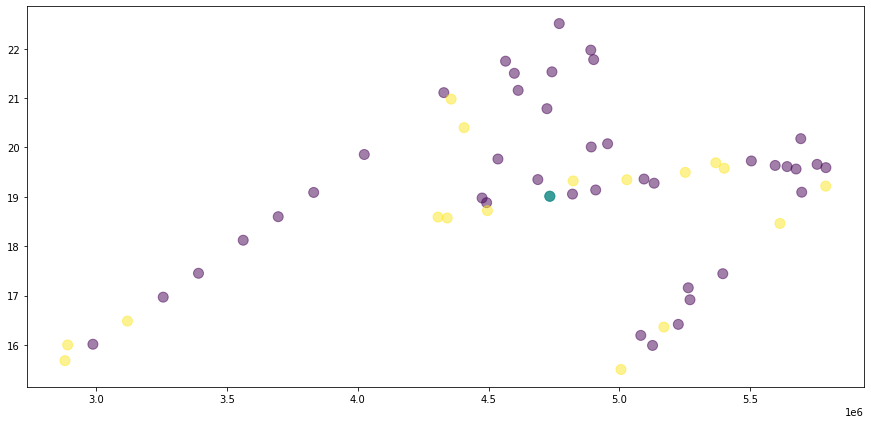

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(df.values[:, 0], df.values[:, 1], c=labels_rbf, s=100, alpha=0.5)

#Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' ) 
y_agg=cluster.fit_predict(df)

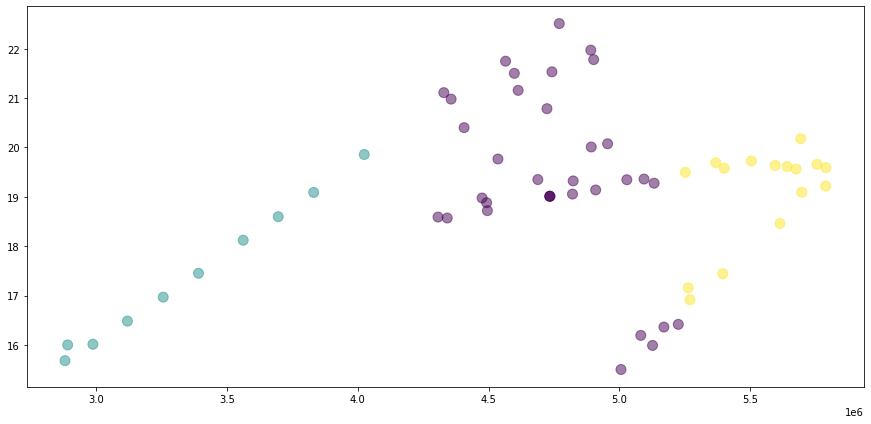

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(df.values[:, 0], df.values[:, 1], c=y_agg, s=100, alpha=0.5)
#plt.scatter(cluster.cluster_centers[:, 0], cluster.cluster_centers[:, 1], c='red', s=400, alpha=0.5);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
dPts_=dPts.to_numpy()
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(dPts_, dtype=tf.float32), num_epochs=1)

In [ ]:
# Kmeans is in tensorflow 2.0 compatible mode
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  #avoid INFO messages
 
num_clusters = 3

kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)


# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(dPts_):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]

score: 28303738000000.0
delta: [[ 2.8076400e+05  1.9064064e+00  4.6408272e+00  3.1606250e+00
   1.4059067e+00  7.0125002e-01  5.0785189e+00  2.3281250e+00
   2.5286000e+05  9.1437501e-01  5.2082539e-04  1.2499997e-02
  -3.4320002e+00 -3.2637501e+00]
 [-4.7029250e+05 -2.1846695e+00  5.1201820e+00  1.1243366e-01
  -3.4690857e-01  2.7480608e-01 -1.2783871e+00  8.2450360e-01
  -5.7777500e+04 -2.5243256e+00 -1.5238285e-02 -1.4285714e-02
  -8.7014675e-02  1.6059056e-03]
 [-3.0195000e+03 -1.7470589e+00 -6.5185204e+00 -7.5240064e-01
  -8.2579041e-01  3.0674607e-02 -1.3285780e+00 -1.4188888e+00
  -7.9742000e+04 -1.1962016e+00  1.6666412e-02 -2.6666668e-01
   1.3496447e-01  1.0919541e-01]]
score: 15647434000000.0
delta: [[ 6.51650000e+04  2.78722763e-01  6.71546936e-01  2.59374976e-01
   2.54005432e-01  6.79807514e-02  3.72204542e-01  1.61875010e-01
   6.28730000e+04  1.17788315e-02  1.20043755e-04  2.88461614e-03
  -4.75999832e-01 -1.51634604e-01]
 [-2.48416250e+05 -3.97308350e-01  5.25329590e-

In [ ]:
centers = kmeans.cluster_centers()
centers

array([[ 5.54426950e+06,  1.90641060e+01,  5.00785255e+01,
        -5.09374976e-01,  8.55602036e+01, -1.08749986e-01,
         2.54171872e+00, -7.18750134e-02,  6.85692900e+06,
         2.34374985e-01,  1.45885420e+00,  1.24999974e-02,
         5.82199955e+00,  2.06249967e-01],
       [ 3.36382450e+06,  1.74264278e+01,  5.31979446e+01,
        -4.45999950e-01,  9.57856979e+01,  3.29999961e-02,
         4.49345398e+00,  7.97626451e-02,  6.26723200e+06,
         4.16046530e-01,  1.45833302e+00,  0.00000000e+00,
         5.85568905e+00, -1.07241370e-01],
       [ 4.75599300e+06,  1.94539547e+01,  4.92694397e+01,
        -2.49600828e-01,  8.91340790e+01, -3.71344507e-01,
         2.83737946e+00,  6.17646659e-03,  5.98972800e+06,
         5.01538932e-01,  1.45808816e+00, -5.88235259e-03,
         5.87154341e+00, -2.54766732e-01]], dtype=float32)

No handles with labels found to put in legend.


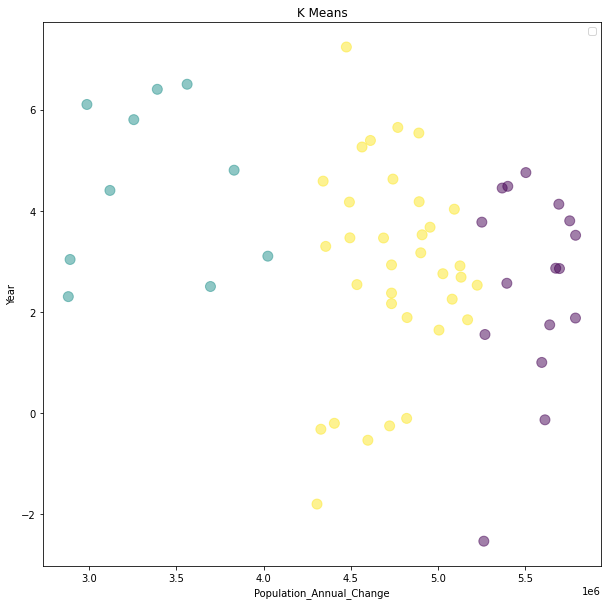

In [ ]:
import matplotlib
from matplotlib import cm
import seaborn as sns
plt.figure(figsize=(10,10))
plt.scatter(df.values[:, 0], df.values[:, 6], c=cluster_indices, s=100, alpha=0.5)
plt.title('K Means')

plt.legend()
plt.show()

In [ ]:
dPts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 22279 to 43828
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   KT_CO2_x                    60 non-null     float64
 1   Metric_TON_PerCapita        60 non-null     float64
 2   Elect_frm_Coal_Percent      60 non-null     float64
 3   Elect_Annual_Change         60 non-null     float64
 4   Energy_Fossil_Use_Percent   60 non-null     float64
 5   Fossil_Enr_Annual_Change    60 non-null     float64
 6   GDP_Growth_Percent          60 non-null     float64
 7   Growth_Annual_Change        60 non-null     float64
 8   KT_CO2_y                    60 non-null     float64
 9   CO2_Annual_Change           60 non-null     float64
 10  percentage_below_poverty    60 non-null     float64
 11  poverty_percent_Change      60 non-null     float64
 12  Unemployment_Rate           60 non-null     float64
 13  Unemployment_Annual_Change  60

#KMeans from TensorFlow

Text(0, 0.5, 'GDP percentage')

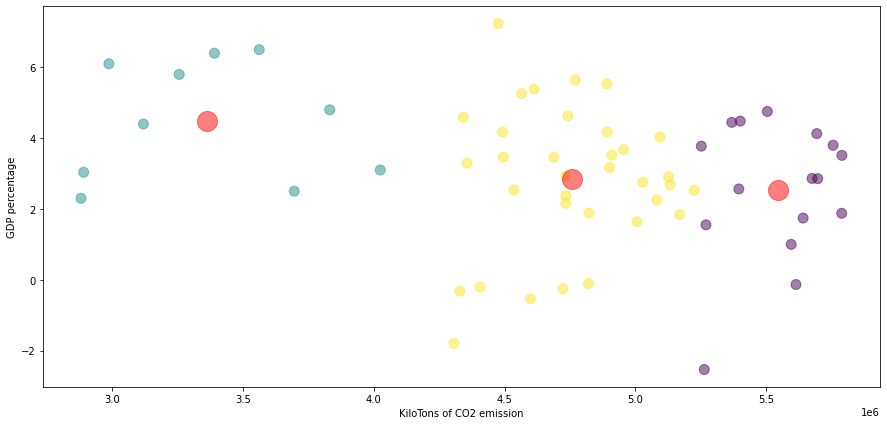

In [ ]:
tensor_data=tf.convert_to_tensor(dPts_, dtype=tf.float32)
plt.subplots(figsize=(15, 7))

plt.scatter(tensor_data[:, 0], tensor_data[:, 6], c=cluster_indices, s=100, alpha=0.5,cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 6], c='red', s=400, alpha=0.5);
plt.xlabel("KiloTons of CO2 emission")
plt.ylabel("GDP percentage")

#KMeans from Pytorch

In [ ]:
#pip install kmeans_pytorch

In [ ]:
import torch
import numpy as np
from kmeans_pytorch import kmeans

In [ ]:
x = torch.from_numpy(df.to_numpy())

# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=3, distance='euclidean', device=torch.device('cuda:0')
)

[running kmeans]: 6it [00:00, 332.40it/s, center_shift=0.000000, iteration=6, tol=0.000100]

running k-means on cuda:0..


Text(0, 0.5, 'GDP percentage')

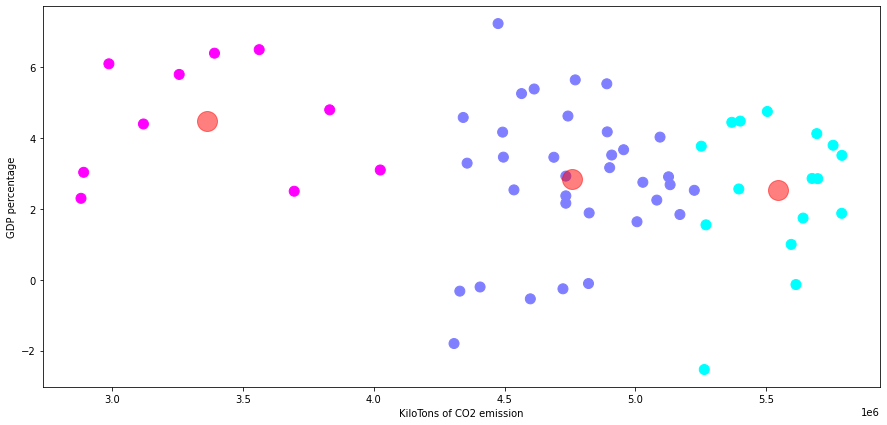

In [ ]:
plt.subplots(figsize=(15, 7))
plt.scatter(x[:, 0], x[:, 6], c=cluster_ids_x, s=100, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 6], c='red', s=400, alpha=0.5)
plt.xlabel("KiloTons of CO2 emission")
plt.ylabel("GDP percentage")

#KMeans from SKLearn

In [ ]:
from sklearn.cluster import KMeans
# K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

Text(0, 0.5, 'GDP percentage')

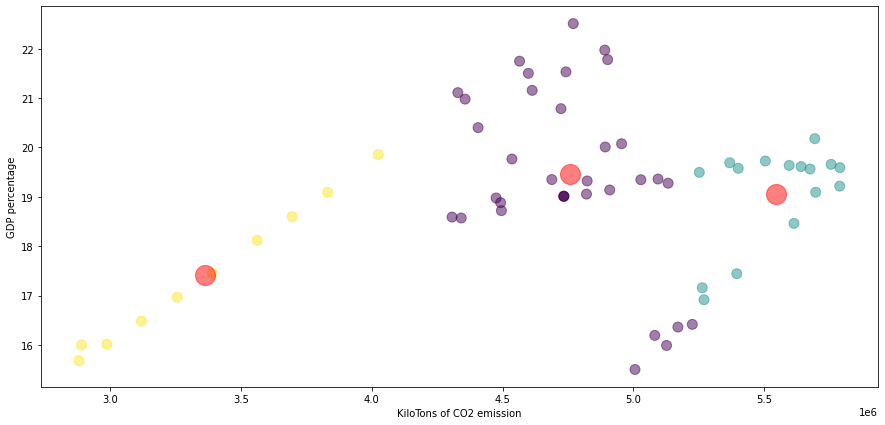

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
y_kmeans = kmeans.fit_predict(df)
plt.scatter(df.values[:, 0], df.values[:, 1], c=y_kmeans, s=100, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=400, alpha=0.5)
plt.xlabel("KiloTons of CO2 emission")
plt.ylabel("GDP percentage")